In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
df = pd.read_csv('laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [153]:
selected_columns = ['ram', 'storage', 'screen', 'final_price']

filtered_df = df[selected_columns]
filtered_df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


<Axes: xlabel='final_price', ylabel='Count'>

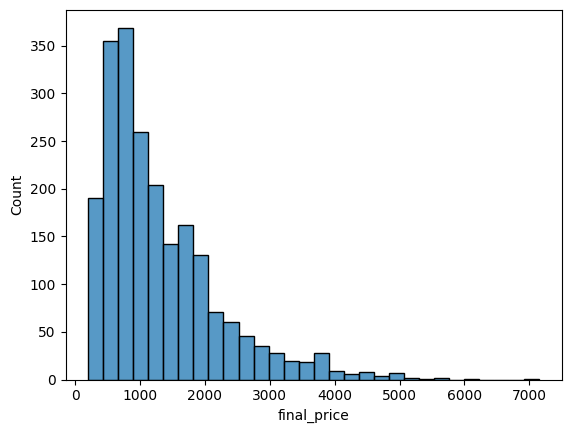

In [154]:
sns.histplot(filtered_df['final_price'], bins=30)

In [155]:
# Question 1
# There's one column with missing values. What is it?
filtered_df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [156]:
# Question 2
# What's the median (50% percentile) for variable 'ram'?
filtered_df['ram'].median()

np.float64(16.0)

In [157]:
# Shuffle the dataset
seed = 42
np.random.seed(seed)
n = len(filtered_df)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = filtered_df.iloc[idx]
df_shuffled.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [158]:
# Split the dataset
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [159]:
# Question 3
# Missing values

# Option 1: With 0
train_data_fill_0 = df_train.fillna(0)
val_data_fill_0 = df_val.fillna(0)

# Option 2: With mean
mean_value = df_train['screen'].mean()
train_data_fill_mean = df_train.fillna(mean_value)
val_data_fill_mean = df_val.fillna(mean_value)

# Evaluate with RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

X_train_0 = train_data_fill_0.drop('final_price', 
                                   axis=1).values
X_val_0 = val_data_fill_0.drop('final_price', axis=1).values
y_train_0 = train_data_fill_0['final_price'].values
y_val_0 = val_data_fill_0['final_price'].values

X_train_mean = train_data_fill_mean.drop('final_price', axis=1).values
X_val_mean = val_data_fill_mean.drop('final_price', axis=1).values
y_train_mean = train_data_fill_mean['final_price'].values
y_val_mean = val_data_fill_mean['final_price'].values

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

w0_0, w_0 = train_linear_regression(X_train_0, y_train_0)
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train_mean)

y_pred_0 = w0_0 + X_val_0.dot(w_0)
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

rmse_0 = float(round(rmse(y_val_0, y_pred_0), 2))
rmse_mean = float(round(rmse(y_val_mean, y_pred_mean), 2))

rmse_0, rmse_mean

(597.36, 600.27)

In [160]:
# Question 4
r_values = [0, 0.01, 1, 10, 100]

def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

for r in r_values:
    w0, w = train_linear_regression_reg(X_train_0, y_train_0, r=r)
    y_pred = w0 + X_val_0.dot(w)
    rmse_r = float(round(rmse(y_val_0, y_pred), 2))
    print(r, rmse_r)

0 597.36
0.01 597.36
1 597.21
10 597.06
100 597.9


In [161]:
# Question 5
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_values = []

for seed in seed_values:
    np.random.seed(seed)

    n = len(filtered_df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = filtered_df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
    df_test = df_shuffled.iloc[n_train + n_val:].copy()
    
    X_train_0 = df_train.fillna(0).drop('final_price', axis=1).values
    X_val_0 = df_val.fillna(0).drop('final_price', axis=1).values
    y_train_0 = df_train['final_price'].values
    y_val_0 = df_val['final_price'].values
    
    w0_0, w_0 = train_linear_regression(X_train_0, y_train_0)
    y_pred_0 = w0_0 + X_val_0.dot(w_0)
    rmse_0 = float(round(rmse(y_val_0, y_pred_0), 2))
    rmse_values.append(rmse_0)

std = np.std(rmse_values)
std = float(round(std, 3))
std

29.176

In [162]:
# Question 6

np.random.seed(9)

n = len(filtered_df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = filtered_df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

train_val_df = pd.concat([df_train, df_val])
train_val_df_0 = train_val_df.fillna(0)
test_df_0 = df_test.fillna(0)

X_train_val_0 = train_val_df_0.drop('final_price', axis=1).values
X_test_0 = test_df_0.drop('final_price', axis=1).values
y_train_val_0 = train_val_df_0['final_price'].values
y_test_0 = test_df_0['final_price'].values

w0_0, w_0 = train_linear_regression_reg(X_train_val_0, y_train_val_0, r=0.001)
y_pred_0 = w0_0 + X_test_0.dot(w_0)
rmse_0 = float(round(rmse(y_test_0, y_pred_0), 2))
rmse_0

608.61